# Part A:

In [168]:
#libraries
import numpy as np 
import pandas as pd
import cv2
import seaborn as sns
import random

#preproccesing
from sklearn.metrics import classification_report,f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# visulization
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Building the training data

In [8]:
x = []
y = []
value = []
for i in range(1000):
    randX = random.randint(-10000, 10000)
    randY = random.randint(-10000, 10000)
    x.append(randX/100)
    y.append(randY/100)
    if y[i] > 1:
        value.append(1)
    else:
        value.append(-1)

end = {'x': x, 'y': y, 'value': value}
df= pd.DataFrame(data=end,
                columns = ['x', 'y', 'value'])

In [15]:
df.to_csv(r'C:\Users\nechd\Desktop\trainingDF.csv', index = False)


## Building the first test data

In [10]:
x = []
y = []
value = []
for i in range(1000):
    randX = random.randint(-10000, 10000)
    randY = random.randint(-10000, 10000)
    x.append(randX/100)
    y.append(randY/100)
    if y[i] > 1:
        value.append(1)
    else:
        value.append(-1)

end = {'x': x, 'y': y, 'value': value}
df= pd.DataFrame(data=end,
                columns = ['x', 'y', 'value'])

In [11]:
df.to_csv(r'C:\Users\nechd\Desktop\firstTestDF.csv', index = False)

## Building the second test data

In [12]:
x = []
y = []
value = []
for i in range(1000):
    randX = random.randint(-10000, 10000)
    randY = random.randint(-10000, 10000)
    x.append(randX/100)
    y.append(randY/100)
    if y[i] > 1:
        value.append(1)
    else:
        value.append(-1)

end = {'x': x, 'y': y, 'value': value}
df= pd.DataFrame(data=end,
                columns = ['x', 'y', 'value'])

In [13]:
df.to_csv(r'C:\Users\nechd\Desktop\secondTestDF.csv', index = False)

### DataFrames:

In [16]:
train = pd.read_csv(r'C:\Users\nechd\Desktop\trainingDF.csv')
first_test = pd.read_csv(r'C:\Users\nechd\Desktop\firstTestDF.csv')
second_test = pd.read_csv(r'C:\Users\nechd\Desktop\secondTestDF.csv')

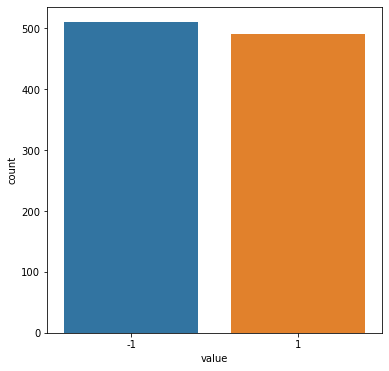

In [17]:
plt.figure(figsize = (6,6))
sns.countplot(x = "value", data = train)

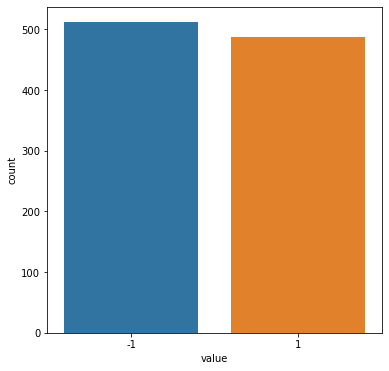

In [18]:
plt.figure(figsize = (6,6))
sns.countplot(x = "value", data = first_test)

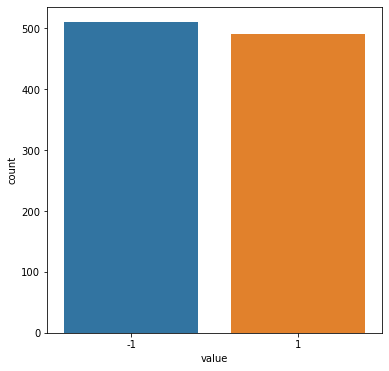

In [19]:
plt.figure(figsize = (6,6))
sns.countplot(x = "value", data = second_test)

## Adaline Algorithm:

In [245]:
def weight_genarate():
    weight = []
    for i in range(2):
        random.seed(i)
        rand = random.uniform(0, 0.01)
        rand=round(rand,4)
        weight.append(rand)
        
    random.seed(4)
    bias = random.uniform(0, 1)
    bias=round(bias,4)
    return weight, bias

In [246]:
# activate 
def activate(x, y, bias, weight):
    return (bias + x*weight[0] + y*weight[1]) 

In [247]:
# error calculation:    
def error_calc(predicted, expected):
    error = (expected - predicted) ** 2
    return error

In [253]:
def adaline_algo(learning_rate, train):
    EPS = 0.0005
    weight, bias = weight_genarate()
#     print(weight, bias)
    
    for index, row in train.iterrows():
        predicted = activate(row['x'], row['y'], bias, weight)
#         print("predicted=",predicted)
        
        # update:
#         print("old weight and bias ", weight, bias)
        weight[0] = round((weight[0] + learning_rate*(row['value'] - predicted)*row['x']),3)
        weight[1] = round((weight[1] + learning_rate*(row['value'] - predicted)*row['y']),3)
        bias = round((bias + learning_rate * (row['value'] - predicted)),3)
        
#         print("new weight and bias ", weight, bias)
        
        # error calc
        error = error_calc(predicted, row['value'])
#         print("error=",error)     
        if error <= EPS or error == 0:
            break
#     print()    
    return weight, bias

In [254]:
# adaline_algo(0.0005, train)

In [255]:
def testing(test):
    weight, bias=adaline_algo(0.0001,train)
    count=0
    for index, row in test.iterrows():
        prediction =activate(row['x'], row['y'], bias, weight) 
        if prediction>=0:
            prediction=1
        else:
            prediction=-1
        if(prediction==row['value']):
            count=count+1
    return(count)

In [256]:
testing(first_test)

879

In [257]:
testing(second_test)

884

In [258]:
x = []
y = []
value = []
random.seed(9)
for i in range(1000):
    randX = random.randint(-10000, 10000)
    randY = random.randint(-10000, 10000)
    x.append(randX/100)
    y.append(randY/100)
    if y[i] > 1:
        value.append(1)
    else:
        value.append(-1)

end = {'x': x, 'y': y, 'value': value}
df2= pd.DataFrame(data=end,columns = ['x', 'y', 'value'])

In [259]:
df2

,x,y,value
0,51.71,22.32,1
1,-12.47,-54.61,-1
2,-39.01,-97.90,-1
3,10.86,64.75,1
4,51.95,98.14,1
...,...,...,...
995,-3.12,2.73,1
996,-65.45,-70.40,-1
997,84.33,37.81,1
998,24.54,24.47,1


In [260]:
testing(df2)

891

In [261]:
def make_df(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(1000):
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX/100)
        y.append(randY/100)
        if y[i] > 1:
            value.append(1)
        else:
            value.append(-1)

    end = {'x': x, 'y': y, 'value': value}
    df= pd.DataFrame(data=end,columns = ['x', 'y', 'value'])
    return df

In [262]:
arr =np.array([])
for i in range(0,100):
    data=make_df(i)
    correct=testing(data)
    correct=correct/1000
    arr=np.append(correct, arr)
print(arr)
max=np.max(arr)
min=np.min(arr)
avg=np.average(arr)
print("min=", min, "max=", max, "avg=", avg)

[0.869 0.89  0.889 0.875 0.881 0.871 0.891 0.9   0.878 0.87  0.878 0.87
 0.868 0.865 0.872 0.883 0.883 0.874 0.861 0.875 0.876 0.873 0.873 0.881
 0.883 0.858 0.877 0.869 0.885 0.892 0.847 0.881 0.896 0.874 0.866 0.895
 0.884 0.849 0.874 0.884 0.876 0.882 0.882 0.88  0.87  0.879 0.879 0.881
 0.852 0.871 0.876 0.885 0.862 0.882 0.878 0.872 0.893 0.874 0.876 0.888
 0.861 0.872 0.86  0.871 0.888 0.875 0.886 0.851 0.869 0.893 0.866 0.879
 0.873 0.887 0.871 0.872 0.898 0.873 0.876 0.876 0.881 0.876 0.882 0.877
 0.885 0.849 0.874 0.877 0.873 0.884 0.891 0.889 0.872 0.882 0.871 0.876
 0.894 0.881 0.873 0.887]
min= 0.847 max= 0.9 avg= 0.8766900000000001
